<img src="pds_banner.png" style="height:200px">


# Laboratorio 4 Procesamiento de señales 2019-2

# Correlación y Autocorrelación

## Universidad de Antioquia

En este laboratorio  se observará el concepto de correlación, la cual es una medida de similitud entre dos señales de tiempo en función del retraso de una con respecto a la otra. Esta se define para dos secuencias en tiempo discreto como:

$$(f \star g)[n]\ \stackrel{\mathrm{def}}{=} \sum_{m=-\infty}^{\infty} f^*[m]\ g[m+n]$$

## 1. Análisis de pulsos de radar



<img src="radar00.jpg" style="height:200px">


<img src="F_7_13.gif" style="height:400px">

Una de las aplicaciones clásicas de la correlación es en los sistemas de radar aeronáuticos. En estos sistemas, un transmisor envía un pulso electromagnético de forma conocida, el cual es reflejado por alguna aeronave y esta reflexión es captada por un receptor. La señal recibida es una copia retrasada y con ruido del pulso original. Para detectar el pulso original en esta señal, se calcula la correlación entre la señal recibida y el pulso original, allí donde se encuentre el máximo de la señal de correlación será la ubicación del pulso en la reflexión.

Otra aplicación de este mismo concepto es en las comunicaciones digitales, en este caso, un pulso que representa un símbolo (conjunto de bits) pasa por un canal que lo distorsiona. En el receptor se realiza la correlación con la forma original del pulso para encontrar el símbolo adecuado.


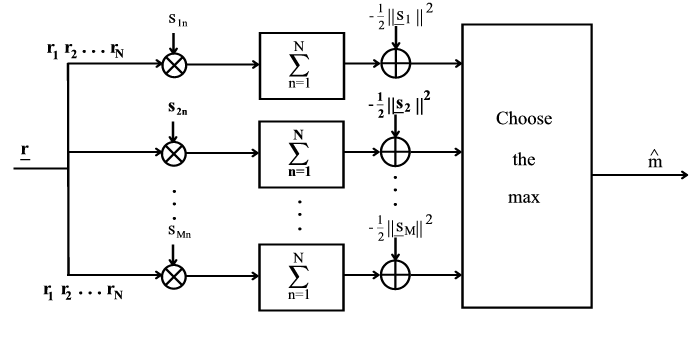

Para esta práctica se deben utilizar las funciones en el módulo ```autocorr.py```. No olvide incluirlo en la misma carpeta que tiene el jupyter-notebook de la práctica e importarlas.

### imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from autocorr import delay_noise

Genere un pulso rectangular de 20 muestras. Utilice la función de numpy ```np.ones(20)```

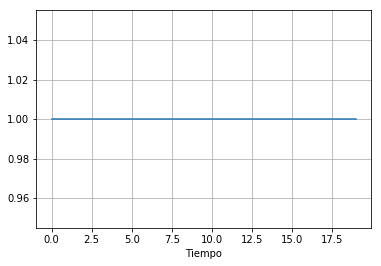

In [2]:
pulse=np.ones(20)
plt.plot(pulse)
plt.xlabel("Tiempo")
plt.grid()
plt.show()

<span style="color:red"> Halle y grafique la función de autocorrelación del pulso generado, y concluya.</span>

<span style="color:red"> Qué puede decir de la función de correlación? ¿Qué puede concluir de la gráfica? </span>

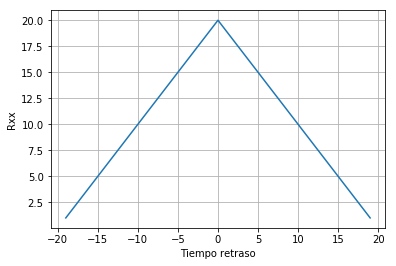

In [3]:
Rxx=np.correlate(pulse, pulse, mode='full')
tau=np.arange(-len(pulse)+1,len(pulse),1)

plt.plot(tau, Rxx)
plt.xlabel("Tiempo retraso")
plt.ylabel("Rxx")
plt.grid()
plt.show()

Utilice la función ```delay_noise(pulse)``` para generar una versión retrasada y ruidosa del pulso. Grafique esta señal, 

<span style="color:red">¿Es capaz de distinguir el pulso y decir cuanto es su retraso?</span>

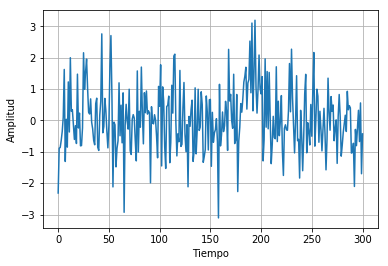

In [4]:
pulse_rx=delay_noise(pulse)

plt.plot(pulse_rx)
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.grid()
plt.show()

Utilice la funcion de ```np.correlate``` para hallar la correlación entre la señal retrasada y la señal transmitida. Utilice la señal resultante para determinar el retraso


Grafique la correlación. 

<span style="color:red">¿Cuál es el retraso? <span>

<span style="color:red">¿Qué se puede concluir? <span>


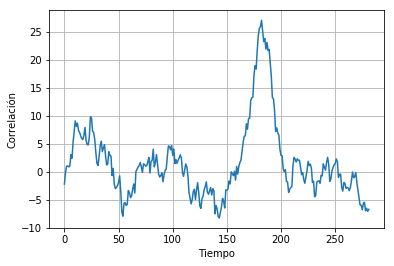

In [5]:
corr=np.correlate(pulse_rx,pulse)

plt.plot(corr)
plt.xlabel("Tiempo")
plt.ylabel("Correlación")
plt.grid()
plt.show()

In [6]:
retraso=np.argmax(corr)
print("El tiempo de retraso es: ", retraso, " unidades de tiempo")

El tiempo de retraso es:  182  unidades de tiempo


## 2. Análisis de señales de aceleración

La función autocorrelación de una señal en tiempo discreto se define como la correlación de la señal con ella misma: 

\begin{equation}
    R_{xx}[\tau]=\sum_{n=-\infty}^{\infty}x[n]\bar{x}[n+\tau]
\end{equation}

La aplicación instalada previamente MoveME permite capturar la señal del acelerómetro del telefono celular. 

https://play.google.com/store/apps/details?id=com.jcvasquezc.moveme

![https://lh3.googleusercontent.com/w7ZGqr5jgXNew4kqOICWAN6rS7RcDH4EtiIQstAd4w8wuLejq21hwHCQ2T6li_vQrwU=s180](https://lh3.googleusercontent.com/w7ZGqr5jgXNew4kqOICWAN6rS7RcDH4EtiIQstAd4w8wuLejq21hwHCQ2T6li_vQrwU=s180)

![](https://lh3.googleusercontent.com/8KGC9PkO9Kx5kyenBGHxX3pjGfQFyzAyhKKWhjAmxoPfF5xoE2Xwr-ET5rCOA8Dzf1s=w720-h310)


Las señales se capturan con una frecuencia de muestreo de 50Hz.

En esta sección vamos a determinar el periodo y la energía cuando la persona realiza actividades físicas. Para ello se utilizará la autocorrelación de la señal. 

---
En la mayoría de señales reales el periodo no se puede determinar directamente de la señal; sin embargo, este se puede estimar analizando la autocorrelación de la señal hallando la diferencia entre picos consecutivos de la señal de auto-correlación.

* Antes de empezar verifique que la aplicación MoveME tenga activos permisos para escribr infomación en la memoria del teléfono.

* Abra la aplicación MoveME instalada en su teléfono.

* En la parte SubjectID introduzca el numero de su cédula, y presione START

* En el campo ```Task``` escriba ```Actividad1```

* Pongase de pie
    
* Presione el botón ```START``` y empiece a dar saltos durante aproximadamente 10 segundos con el teléfono en la mano, y presione el botón ```STOP```.
    
* En la memoria interna de su teléfono debió crearse una carpeta llamada ```MoveME```, dentro de la cual hay otra carpeta con la fecha actual y el ```ID``` introducido. Dentro de la carpeta se encuentran el archivo correspondiente a ```Actividad1.txt```.
    
* Transfiera los archivos obtenidos al computador, con un cable USB, o por correo electrónico.
    
* Abra el archivos de texto ```Actividad1.txt``` y elimine la primera fila en caso de que salga un ```null```.
    
* Cargue el archivo ```Actividad1.txt``` y extraiga la tercera columna de los datos (acelerómetro en el eje Z)
    
  <span style="color:red"> ¿Por qué esta columna? <span>
  

(2997, 3)


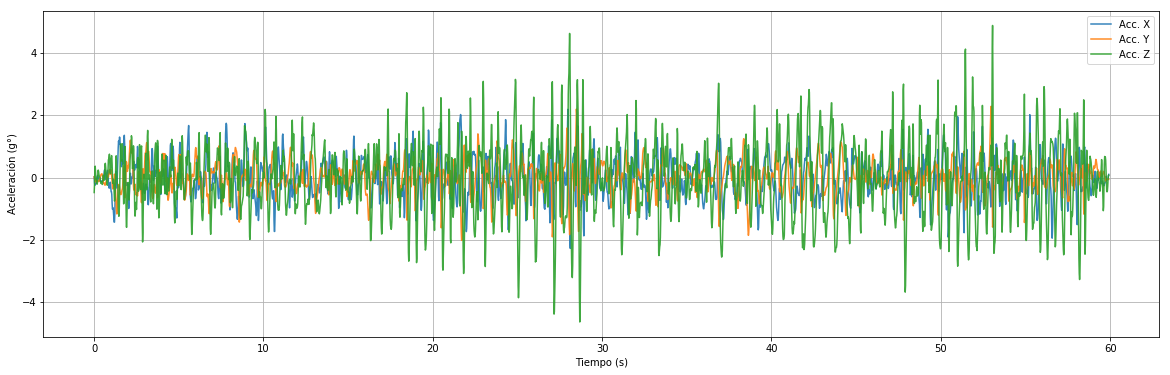

In [7]:
fs=50
data=np.loadtxt("Actividad1.txt")
print(data.shape)

t=np.arange(data.shape[0])/fs
plt.figure(figsize=(20,6))
plt.plot(t, data[:,0], label="Acc. X", alpha=0.9)
plt.plot(t, data[:,1], label="Acc. Y", alpha=0.9)
plt.plot(t, data[:,2], label="Acc. Z", alpha=0.9)
plt.xlabel("Tiempo (s)")
plt.ylabel("Aceleración (g°)")
plt.legend()
plt.grid()
plt.show()


### zoom entre 20 y 30 segundos

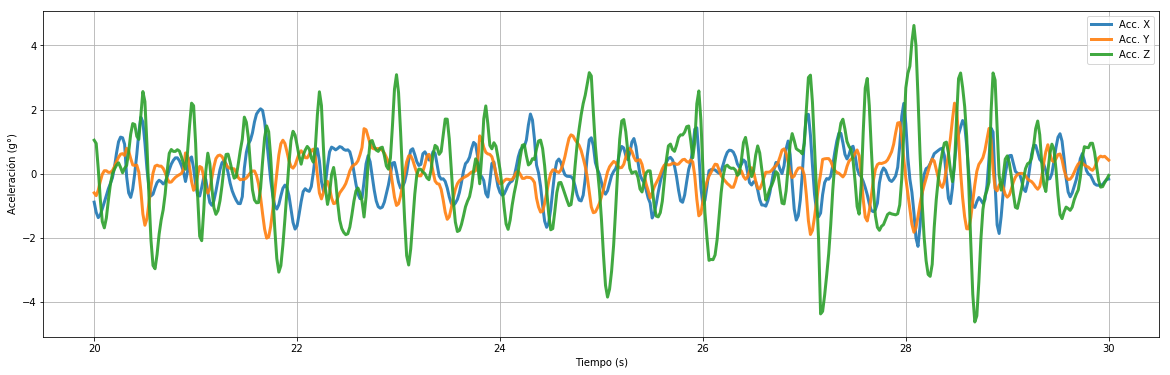

In [8]:
t=np.arange(data.shape[0])/fs
tzoom=np.where((t >= 20) & (t <= 30))[0]

plt.figure(figsize=(20,6))
plt.plot(t[tzoom], data[tzoom,0], label="Acc. X", alpha=0.9, linewidth=3)
plt.plot(t[tzoom], data[tzoom,1], label="Acc. Y", alpha=0.9, linewidth=3)
plt.plot(t[tzoom], data[tzoom,2], label="Acc. Z", alpha=0.9, linewidth=3)
plt.xlabel("Tiempo (s)")
plt.ylabel("Aceleración (g°)")
plt.legend()
plt.grid()
plt.show()

In [9]:
acc=data[:,2]

Normalice la señal restándole la media y luego dividiendo por su máximo valor absoluto (Recuerde del laboratorio 1).

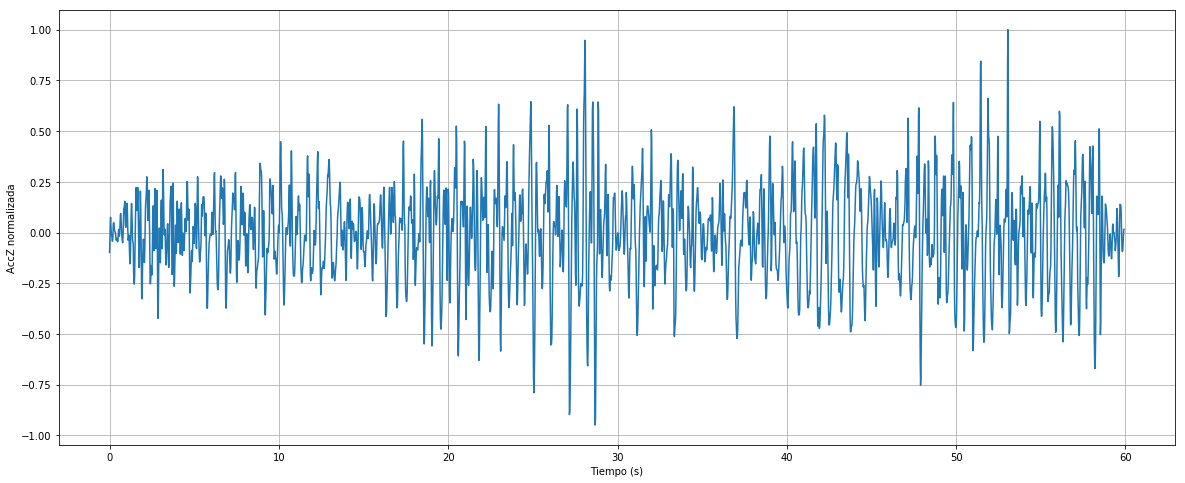

In [10]:
acc=acc-np.mean(acc)
acc=acc/np.max(np.abs(acc))

plt.figure(figsize=(20,8))
plt.plot(t, acc)
plt.xlabel("Tiempo (s)")
plt.ylabel("AccZ normalizada")
plt.grid()
plt.show()

Grafique la señal obtenida, y si está muy ruidosa, apliquele a la señal un filtro de media móvil con $L=5$ (Recuerde del laboratorio 3).

Coeficientes del filtro [0.2 0.2 0.2 0.2 0.2]


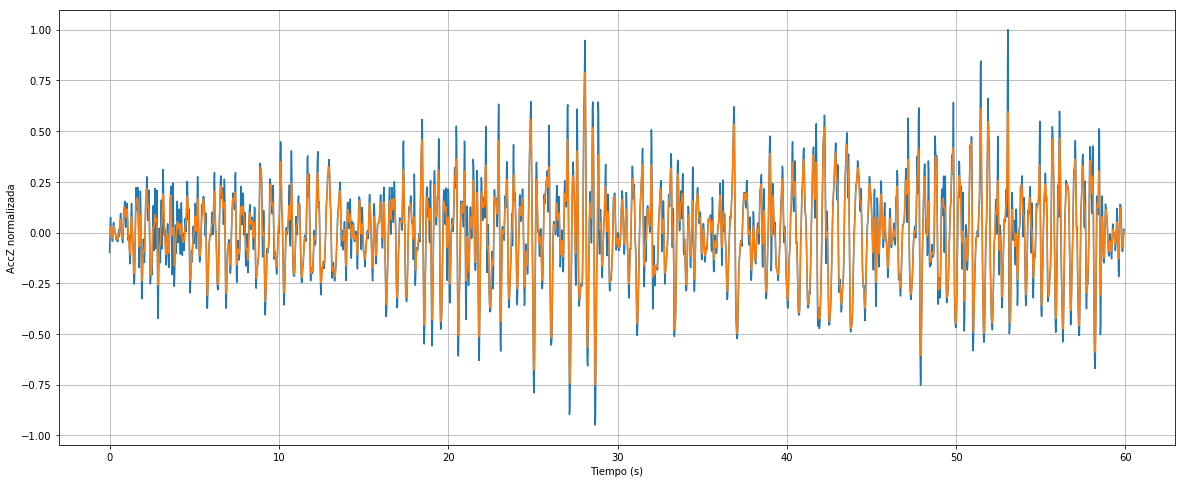

In [11]:
L=5
coefs=np.ones(L)/float(L)
print("Coeficientes del filtro", coefs)

acc_filtered=np.convolve(acc, coefs, mode='same')

plt.figure(figsize=(20,8))
plt.plot(t, acc)
plt.plot(t, acc_filtered)
plt.xlabel("Tiempo (s)")
plt.ylabel("AccZ normalizada")
plt.grid()
plt.show()

Calcule la autocorrelación de la señal obtenida y grafiquela.  
<span style="color:red"> ¿Qué se puede concluir? </span>

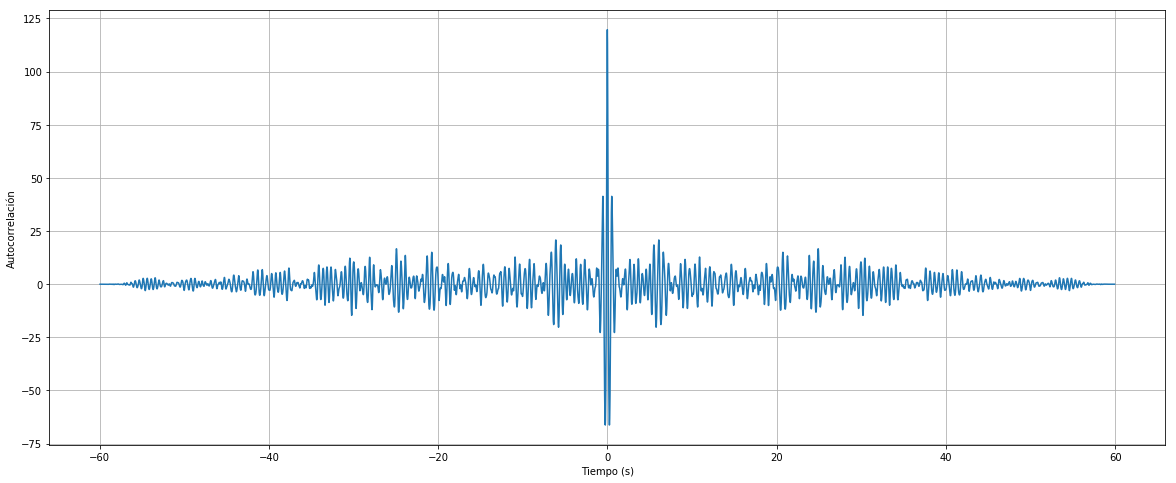

In [12]:
Rxx=np.correlate(acc_filtered, acc_filtered, mode='full')
t2=np.arange(-len(acc_filtered), len(acc_filtered)-1, 1)/fs
plt.figure(figsize=(20,8))
plt.plot(t2, Rxx)
plt.xlabel("Tiempo (s)")
plt.ylabel("Autocorrelación")
plt.grid()
plt.show()

### zoom entre 0 y 5 segundos

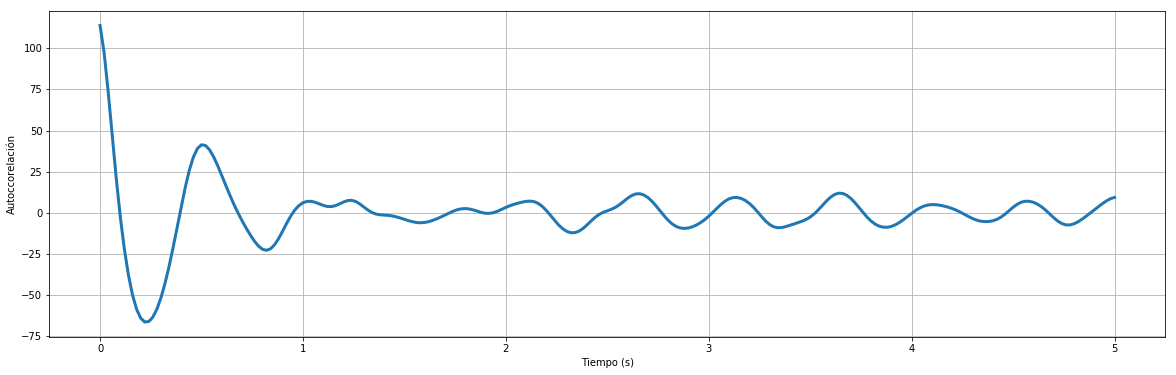

In [13]:
tzoom=np.where((t2 >= 0) & (t2 <= 5))[0]

plt.figure(figsize=(20,6))
plt.plot(t2[tzoom], Rxx[tzoom], linewidth=3)
plt.xlabel("Tiempo (s)")
plt.ylabel("Autoccorelación")
plt.grid()
plt.show()

El periodo de la señal correponde al tiempo entre 0 y laposición del primer pico de la función de autocorrelación. Ya que es donde se encuentra la maxima similitud de las señales cuando van acorriendo los desplazamientos

### Medición del periodo de la señal

Determine e indique el periodo de la señal a partir del tiempo para el primer máximo global de la autocorrelación despues de cero.

* Buscamos solo los valores de tiempo positivo de la autocorerlacion (Recuere que la función es par)

* Buscamos la posición del primer máximo despues del primer pico minimo (para excluir el maximo en 0)


* Finalmente encontramos la posición del pico máximo


In [14]:
Rxxp=Rxx[int(len(Rxx)/2):]

pos_min=np.argmin(Rxxp)

print(pos_min)

Rxxlow=Rxxp[pos_min:]

maxvpeak=np.max(Rxxlow)
print("valor del pico máximo de amplitud:", maxvpeak)

pos_max=np.where(Rxxp==maxvpeak)[0]
print("posición del maximo pico de amplitud:", pos_max)

periodo=pos_max[0]/fs

print("Periodo de la señal", periodo, "segundos")



12
valor del pico máximo de amplitud: 41.33980033036265
posición del maximo pico de amplitud: [26]
Periodo de la señal 0.52 segundos


<span style="color:red"> Repita todo el procediminto anterior para otras actividades. Correr, caminar, entre otras. A cada actividad que capture con la aplicación, asignele un nombre diferente para comparar.</span>

<span style="color:red"> Recuerde también que para diferentes actividades realizadas, el eje de aceleración que capturas debe ser diferente (no el eje Z).</span>

<span style="color:red" >Compare el periodo obtenido para diferentes actividades y concluya al respecto</span>